<a href="https://colab.research.google.com/github/parulgo7/GHH22_EmployeeEmpowerment/blob/main/GirlsHooCodeHackathonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Section 1. Load Data

In [ ]:
# Import some common packages
import os
import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
import pandas as pd

def loadGapData():
  gapdata = pd.read_csv("/content/sample_data/Glassdoor Gender Pay Gap.csv")
  return gapdata

gapdata = loadGapData()


gapdata.head(10)
gapdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
gapdata['JobTitle'].unique()

array(['Graphic Designer', 'Software Engineer', 'Warehouse Associate',
       'IT', 'Sales Associate', 'Driver', 'Financial Analyst',
       'Marketing Associate', 'Data Scientist', 'Manager'], dtype=object)

In [ ]:
gapdata.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


###Section 2. Data Discovery

In [ ]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
corr_matrix = gapdata.corr()
corr_matrix.shape
corr_matrix['BasePay'].sort_values(ascending=False)

BasePay      1.000000
Age          0.562681
Seniority    0.511096
PerfEval    -0.053622
Bonus       -0.129481
Name: BasePay, dtype: float64

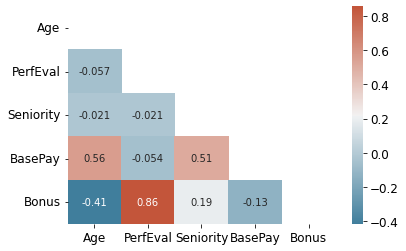

In [ ]:
import seaborn as sns

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, mask = mask, cmap=cmap)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72d78912d0>,
      dtype=object)

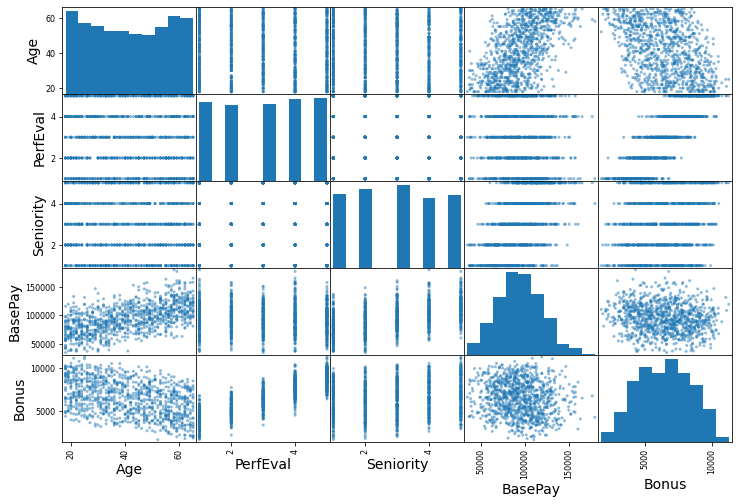

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['JobTitle', 'Gender', 'Age', 'PerfEval', 'Education', 'Dept', 'Seniority', 'BasePay', 'Bonus']

scatter_matrix(gapdata[attributes], figsize=(12,8))

### Section 3. Feature Engineering, Data Cleaning and Standardization 

In [ ]:
gapdata['JobTitle'].unique()

array(['Graphic Designer', 'Software Engineer', 'Warehouse Associate',
       'IT', 'Sales Associate', 'Driver', 'Financial Analyst',
       'Marketing Associate', 'Data Scientist', 'Manager'], dtype=object)

In [ ]:
gapdata['Dept'].unique()

array(['Operations', 'Management', 'Administration', 'Sales',
       'Engineering'], dtype=object)

In [ ]:
def job_groups(x):
  if x == 'Graphic Designer':
    return 'Graphic Designer'
  elif x == 'Software Engineer' or x == 'IT' or x == 'Data Scientist':
    return 'Technical'
  elif x == 'Warehouse Associate' or x == 'Driver':
    return 'Non-Technical'
  elif x == 'Marketing Associate' or 'Sales Associate':
    return 'Sales/Marketing'
  elif x == 'Manager' or x == 'Financial Analyst':
    return 'Management/Finance'

gapdata['JobGroup'] = gapdata['JobTitle'].apply(job_groups)


In [ ]:
del gapdata['JobTitle']

In [ ]:
# observe numerical attributes in the raw data set
gapdata_num = gapdata.select_dtypes(include=[np.number])
gapdata_num.info()
num_attribs = list(gapdata_num)
print(num_attribs)

# observe categorical attributes in the raw data set
gapdata_cat = gapdata.select_dtypes(include=[object])
gapdata_cat.info()
cat_attribs = list(gapdata_cat)
print(cat_attribs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        1000 non-null   int64
 1   Seniority  1000 non-null   int64
 2   BasePay    1000 non-null   int64
 3   Bonus      1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB
['Age', 'Seniority', 'BasePay', 'Bonus']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     1000 non-null   object
 1   Education  1000 non-null   object
 2   Dept       1000 non-null   object
 3   JobGroup   1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB
['Gender', 'Education', 'Dept', 'JobGroup']


In [ ]:
# we want to manually ordinal encode "Education" so that a high school education
# is the lowest value and a PhD is the highest value
scale_mapping = {"High School":0, "College":1, "Masters": 2, "PhD":3}
gapdata["Education"] = gapdata["Education"].replace(scale_mapping)

# ensure that "Education" is now a numerical feature and not a categorical feature
cat_attribs.remove("Education")
num_attribs.append("Education")

print(cat_attribs)
print(num_attribs)

['Gender', 'Dept', 'JobGroup']
['Age', 'Seniority', 'BasePay', 'Bonus', 'Education']


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_prepared = full_pipeline.fit_transform(gapdata)

New strategy: use k means to visualize clusters of similar employees.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=300, random_state=1)
y_pred = kmeans.fit_predict(X_prepared)

print(y_pred)


[4 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 4 2 2 4 2 2 2
 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 4 2 2 4 0 4 2 4 2 4 2 2
 4 4 4 2 4 2 2 2 4 4 2 4 3 2 4 2 4 2 4 1 2 2 0 2 4 0 2 2 3 2 2 2 4 4 3 2 2
 2 1 4 3 2 4 2 2 4 4 4 0 0 3 4 0 2 2 2 0 1 2 4 2 4 3 2 4 2 3 2 2 2 2 3 2 4
 2 4 0 1 2 4 3 3 2 0 3 2 3 1 1 2 4 0 4 4 4 4 2 4 3 2 2 0 4 4 2 0 2 0 4 4 2
 3 2 3 1 3 0 1 2 2 4 0 3 2 4 4 4 2 4 1 4 2 2 1 2 4 3 2 2 4 3 2 2 1 2 0 0 0
 2 4 3 0 4 2 2 4 4 4 4 0 4 4 4 2 1 2 4 2 2 2 4 2 2 2 2 2 2 4 3 1 4 4 4 3 0
 2 3 4 1 4 1 4 4 4 4 4 3 1 2 2 0 2 4 2 1 2 4 3 4 4 0 4 0 3 2 3 2 2 2 1 3 0
 3 2 0 3 1 4 4 0 2 2 1 4 0 0 1 2 4 2 4 4 2 1 1 2 0 4 3 4 2 3 3 0 3 2 4 0 2
 0 2 3 1 0 2 4 0 0 3 4 0 4 0 2 4 3 0 0 3 0 0 4 3 0 2 4 4 2 4 1 4 3 0 4 2 4
 2 1 2 1 3 4 1 1 1 2 4 4 1 4 4 4 0 2 1 2 3 4 2 0 3 0 2 2 1 0 4 4 3 4 4 2 1
 1 4 4 4 3 3 0 4 4 3 2 2 4 0 1 0 4 3 0 2 2 2 0 0 1 4 3 0 3 1 4 0 3 1 2 1 1
 0 4 0 3 3 3 1 0 2 4 2 4 0 3 4 1 3 2 0 1 1 4 0 2 3 3 3 2 4 1 3 2 3 1 3 3 2
 2 0 0 1 4 0 3 4 2 4 0 3 

Now, let's graph Inertia vs. K to determine the 'elbow' location to find the optimal number of k! 

In [ ]:
kmeans.labels_

array([4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 3, 2,
       4, 2, 4, 2, 4, 1, 2, 2, 0, 2, 4, 0, 2, 2, 3, 2, 2, 2, 4, 4, 3, 2,
       2, 2, 1, 4, 3, 2, 4, 2, 2, 4, 4, 4, 0, 0, 3, 4, 0, 2, 2, 2, 0, 1,
       2, 4, 2, 4, 3, 2, 4, 2, 3, 2, 2, 2, 2, 3, 2, 4, 2, 4, 0, 1, 2, 4,
       3, 3, 2, 0, 3, 2, 3, 1, 1, 2, 4, 0, 4, 4, 4, 4, 2, 4, 3, 2, 2, 0,
       4, 4, 2, 0, 2, 0, 4, 4, 2, 3, 2, 3, 1, 3, 0, 1, 2, 2, 4, 0, 3, 2,
       4, 4, 4, 2, 4, 1, 4, 2, 2, 1, 2, 4, 3, 2, 2, 4, 3, 2, 2, 1, 2, 0,
       0, 0, 2, 4, 3, 0, 4, 2, 2, 4, 4, 4, 4, 0, 4, 4, 4, 2, 1, 2, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 3, 1, 4, 4, 4, 3, 0, 2, 3, 4, 1, 4,
       1, 4, 4, 4, 4, 4, 3, 1, 2, 2, 0, 2, 4, 2, 1, 2, 4, 3, 4, 4, 0, 4,
       0, 3, 2, 3, 2, 2, 2, 1, 3, 0, 3, 2, 0, 3, 1,

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

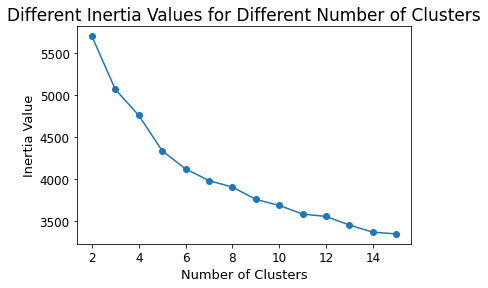

In [ ]:
inertia_list = []

for clusters in range(2,16):
  model = KMeans(n_clusters=clusters, init="random", n_init=1, 
                 algorithm="full", max_iter=300, random_state=1)
  model.fit_predict(X_prepared)
  inertia_list.append(model.inertia_)

plt.plot(range(2,16),inertia_list)
plt.scatter(range(2,16),inertia_list)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

Here we can see that our 'elbow' is at k = 5. That means that 5 clusters is optimal for the dataset that we've prepared! 

Now, let's go ahead and visualize our clusters along different axises!!! 

In [78]:
gapdata

,Gender,Age,Education,Dept,Seniority,BasePay,Bonus,JobGroup
0,Female,18,1,Operations,2,42363,9938,Graphic Designer
1,Male,21,1,Management,5,108476,11128,Technical
2,Female,19,3,Administration,5,90208,9268,Non-Technical
3,Male,20,2,Sales,4,108080,10154,Technical
4,Male,26,2,Engineering,5,99464,9319,Graphic Designer
...,...,...,...,...,...,...,...,...
995,Female,61,0,Administration,1,62644,3270,Sales/Marketing
996,Male,57,2,Sales,2,108977,3567,Technical
997,Male,48,0,Operations,1,92347,2724,Sales/Marketing
998,Male,65,0,Administration,1,97376,2225,Sales/Marketing


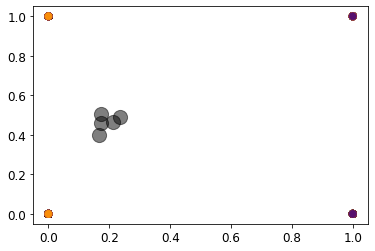

In [83]:
model = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=300, random_state=1)
y_pred = model.fit_predict(X_prepared)


X_col = 7
Y_col = 5

plt.scatter(X_prepared[:, X_col], X_prepared[:, Y_col], c=y_pred, s=50, cmap='inferno')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, X_col], centers[:, Y_col], c='black', s=200, alpha=0.5);

# plt.xlabel("longitude")
# plt.ylabel("latitude")
